In [1]:
import json
import praw
import networkx as nx


Final Version

In [2]:
id, secret, agent = "vJXa5Q5sIvO6Yn4cVKzxUg", "TSphVe_IMaCTIclQrU1RX2YamQqLfw", "ImBrown2"

redditAPI = praw.Reddit(client_id=id, client_secret=secret, user_agent=agent)

graph = nx.Graph()

posts_history = list()


def build_graph(depth, start):
    posts = redditAPI.subreddit(start).new(limit=depth)
    for post in posts:  
        key = f'{post.subreddit_name_prefixed} - {post.id}'
        graph.add_node(key, name=post.id)
        posts_history.append(key)
        post_author = post.author
        author_posts = post_author.submissions.new(limit=depth)
        print(key)
        inner_history = list()
        for inner_post in author_posts:
            inner_key = f'{inner_post.subreddit_name_prefixed} - {inner_post.id}'
            if not inner_post.id == post.id: # This means we can add the node and connection to its post.
                print(f'\t{inner_key}')
                graph.add_node(inner_key, name=inner_post.id)
                inner_history.append(inner_key)
                graph.add_edge(key, inner_key)
        for i in range(len(inner_history ) - 1):
            graph.add_edge(inner_history[i], inner_history[i - 1])
    
    for i in range(len(posts_history ) - 1):
        graph.add_edge(posts_history[i], posts_history[i - 1])
            
            
            
                

        

            

build_graph(50, 'all')


### Centrallity Measures:
top_k = 5 # Choose a size close to the depth.
centrality_degree = nx.degree_centrality(graph)
for u in sorted(centrality_degree, key=centrality_degree.get, reverse=True)[:top_k]:
    print(u, graph.nodes[u]['name'], centrality_degree[u])

nx.draw_networkx(graph, with_labels=True, node_size=50, font_size=False)


    

Version 7.5.0 of praw is outdated. Version 7.6.0 was released Tuesday May 10, 2022.


r/twittermoment - xrm1th
	r/twittermoment - xnuuuc
	r/ifuckinghatecats - xnrz1o
	r/blursedimages - xnoirm
	r/blursedimages - xmhphi
	r/Paranormal - xmavfr
	r/animenocontext - xdnq3y
	r/RoleReversal - x96rak
	r/shitposting - x6uua9
	r/shitposting - x1rw8j
	r/shitposting - x1keh8
	r/oddlyterrifying - wzc7ro
	r/Komi_san - wt8ndm
	r/RoleReversal - whqms0
	r/RoleReversal - wg7q9k
	r/Unexpected - wfpf80
	r/cursedimages - w1hg8d
	r/cursedimages - w1hb81
	r/LiminalSpace - vjxgzj
	r/gentlefemdom - vi1woh
	r/mildlyinfuriating - uyjetw
	r/RoleReversal - uwyjqb
	r/memes - uhg857
	r/apexlegends - qjk8se
	r/Komi_san - qeax0p
	r/RoleReversal - h8wv5w
r/RedditShoppingDeals - xrm1te
	r/RedditShoppingDeals - xrlxxf
	r/RedditShoppingDeals - xrlu0h
	r/RedditShoppingDeals - xrjgho
	r/RedditShoppingDeals - xrjc82
	r/RedditShoppingDeals - xri60n
	r/RedditShoppingDeals - xri1wm
	r/RedditShoppingDeals - xrgv6u
	r/RedditShoppingDeals - xrgql6
	r/RedditShoppingDeals - xrfnd6
	r/RedditShoppingDeals - xrfixg
	r/Re

Early Version

[]
Graph with 3 nodes and 0 edges


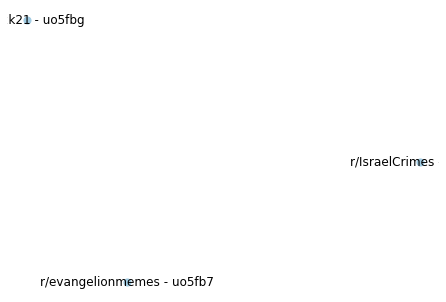

In [ ]:
id, secret, agent = "vJXa5Q5sIvO6Yn4cVKzxUg", "TSphVe_IMaCTIclQrU1RX2YamQqLfw", "ImBrown2"

redditAPI = praw.Reddit(client_id=id, client_secret=secret, user_agent=agent)

graph = nx.Graph()

posts_history = list()

# Starts with [depth] popular posts on [startingSub], and for each post, 
# goes through the authors [depth] most popular post. 
def build_graph_(depth, starting_sub):
    for post in redditAPI.subreddit(starting_sub).hot(limit=depth):
        print("Visiting & Adding: " + post.subreddit_name_prefixed + "from: " + starting_sub)
        graph.add_node(post.subreddit_name_prefixed)
        authors_posts = post.author.submissions.hot(limit=depth)
        for inner_post in authors_posts:
            if post.id == inner_post.id: continue
            graph.add_node(inner_post.subreddit_name_prefixed)
            graph.add_edge(post.subreddit_name_prefixed, inner_post.subreddit_name_prefixed)
            print("Visiting & Adding: " + inner_post.subreddit_name_prefixed)
        
        #posts.append(post)

    for i in range(1, len(posts) - 1):
        graph.add_edge(posts[i].subreddit, posts[i - 1].subreddit)


build_graph(3, "all")
print(graph)

# And draw the graph with node labels
nx.draw(graph,  
        node_color='#A0CBE2', 
        with_labels=True,
        node_size=50)

nx.write_graphml(graph, "output.reddit.graphml", prettyprint=False)
    
